In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
x = digits.data
y = digits.target

In [5]:
x_tr = np.copy(x)
y_tr = np.copy(y)
np.random.shuffle([x_tr, y_tr])

9


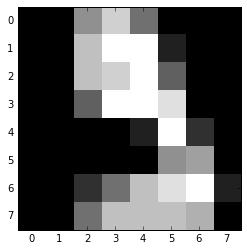

In [6]:
i = 29
img = x[i]
plt.imshow(img.reshape(8, 8), interpolation='Nearest', cmap='gray')
print(y_tr[i])

In [7]:
n_tr = int(y_tr.size * 0.8)
x_te = x_tr[n_tr:, :]
y_te = y_tr[n_tr:]
x_tr = x_tr[:n_tr, :]
y_tr = y_tr[:n_tr]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_tr = scaler_x.fit_transform(x_tr)
x_te = scaler_x.transform(x_te)
y_tr_reg = scaler_y.fit_transform(y_tr)
y_te_reg = scaler_y.transform(y_te)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


In [26]:
# np.save('data_reg/x_tr.npy', x_tr)
# np.save('data_reg/x_te.npy', x_te)
# np.save('data_reg/y_tr.npy', y_tr_reg)
# np.save('data_reg/y_te.npy', y_te_reg)

In [29]:
# np.save('data_class/x_tr.npy', x_tr)
# np.save('data_class/x_te.npy', x_te)
# np.save('data_class/y_tr.npy', y_tr)
# np.save('data_class/y_te.npy', y_te)

## PCA vizualization

In [61]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

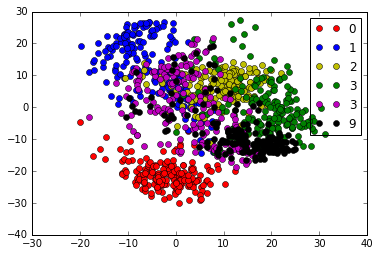

In [45]:
plt.clf()
zeros = x_2d[y == 0]
ones = x_2d[y == 1]
twos = x_2d[y == 2]
threes = x_2d[y == 3]
fives = x_2d[y == 5]
nines = x_2d[y == 9]

plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'bo', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'yo', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fives[:, 0], fives[:, 1], 'mo', label='3')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.legend()

3d for comparison

In [121]:
pca = PCA(n_components=3)
x_tr_3d = pca.fit_transform(x_tr)
x_te_3d = pca.transform(x_te)
np.save('../../data/temp/x_tr.npy', x_tr_3d)
np.save('../../data/temp/x_te.npy', x_te_3d)
np.save('../../data/temp/y_tr.npy', y_tr)
np.save('../../data/temp/y_te.npy', y_te)

## Vizualization of learned P

In [68]:
P = np.load('../../gptfnn/P.npy')

In [69]:
imgs = x_tr.dot(P.T) / 3
imgs[imgs < -1] = -1
imgs[imgs > 1] = 1

In [70]:
labels = scaler_y.inverse_transform(y_tr).astype(int)

In [71]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_tr)

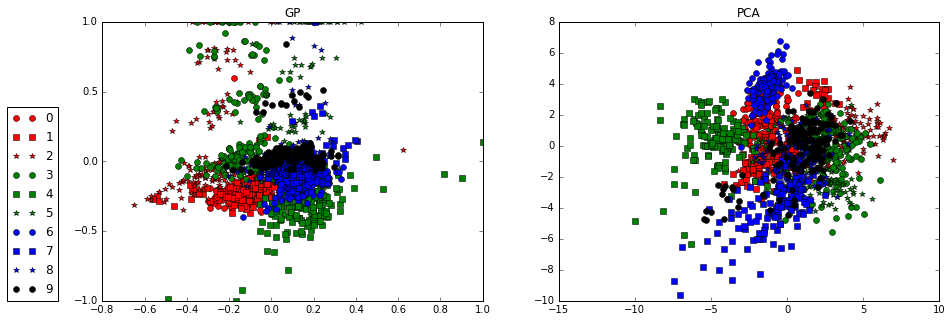

In [72]:
plt.clf()
plt.figure(figsize=(15, 5))
zeros = imgs[labels == 0]
ones = imgs[labels == 1]
twos = imgs[labels == 2]
threes = imgs[labels == 3]
fours = imgs[labels == 4]
fives = imgs[labels == 5]
sixes = imgs[labels == 6]
sevens = imgs[labels == 7]
eights = imgs[labels == 8]
nines = imgs[labels == 9]

plt.subplot(1, 2, 1)
plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'rs', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'r*', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fours[:, 0], fours[:, 1], 'gs', label='4')
plt.plot(fives[:, 0], fives[:, 1], 'g*', label='5')
plt.plot(sixes[:, 0], sixes[:, 1], 'bo', label='6')
plt.plot(sevens[:, 0], sevens[:, 1], 'bs', label='7')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.legend(loc=(-0.25, 0))
plt.title('GP')

plt.subplot(1, 2, 2)
zeros = x_2d[labels == 0]
ones = x_2d[labels == 1]
twos = x_2d[labels == 2]
threes = x_2d[labels == 3]
fours = x_2d[labels == 4]
fives = x_2d[labels == 5]
sixes = x_2d[labels == 6]
sevens = x_2d[labels == 7]
eights = x_2d[labels == 8]
nines = x_2d[labels == 9]
plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'rs', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'r*', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fours[:, 0], fours[:, 1], 'gs', label='4')
plt.plot(fives[:, 0], fives[:, 1], 'g*', label='5')
plt.plot(sixes[:, 0], sixes[:, 1], 'bo', label='6')
plt.plot(sevens[:, 0], sevens[:, 1], 'bs', label='7')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.title('PCA')
# plt.legend(loc=(-0.25, 0))

Let's look at the embedding learned by the neural net

In [11]:
W1 = np.load('W1.npy')
W2 = np.load('W2.npy')
W3 = np.load('W3.npy')
b1 = np.load('b1.npy')
b2 = np.load('b2.npy')

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
layer_1 = sigmoid(x_tr.dot(W1) + b1)
layer_2 = sigmoid(layer_1.dot(W2) + b2)
layer_3 = layer_2.dot(W3)
imgs = layer_3

scaler = StandardScaler()
imgs = scaler.fit_transform(imgs)
imgs /= 3

imgs[imgs < -1] = -1
imgs[imgs > 1] = 1


In [17]:
# labels = scaler_y.inverse_transform(y_tr).astype(int)
labels = y_tr

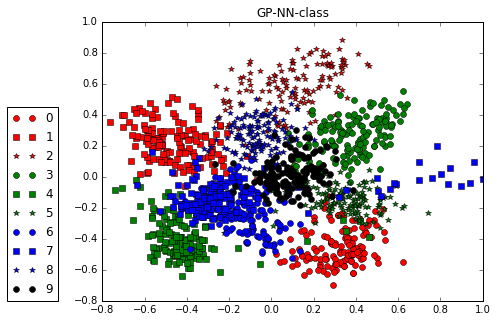

In [19]:
plt.clf()
plt.figure(figsize=(15, 5))
zeros = imgs[labels == 0]
ones = imgs[labels == 1]
twos = imgs[labels == 2]
threes = imgs[labels == 3]
fours = imgs[labels == 4]
fives = imgs[labels == 5]
sixes = imgs[labels == 6]
sevens = imgs[labels == 7]
eights = imgs[labels == 8]
nines = imgs[labels == 9]

plt.subplot(1, 2, 1)
plt.plot(zeros[:, 0], zeros[:, 1], 'ro', label='0')
plt.plot(ones[:, 0], ones[:, 1], 'rs', label='1')
plt.plot(twos[:, 0], twos[:, 1], 'r*', label='2')
plt.plot(threes[:, 0], threes[:, 1], 'go', label='3')
plt.plot(fours[:, 0], fours[:, 1], 'gs', label='4')
plt.plot(fives[:, 0], fives[:, 1], 'g*', label='5')
plt.plot(sixes[:, 0], sixes[:, 1], 'bo', label='6')
plt.plot(sevens[:, 0], sevens[:, 1], 'bs', label='7')
plt.plot(eights[:, 0], eights[:, 1], 'b*', label='8')
plt.plot(nines[:, 0], nines[:, 1], 'ko', label='9')
plt.legend(loc=(-0.25, 0))
plt.title('GP-NN-class')